In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tkinter import Tk     


# Data selection
choose which data are used in the experiment, english and thai one

In [3]:

# call the reference table
oldword = pd.read_excel("./image test/ref/wordlist_dict.xlsx")
newword = pd.read_excel("./image test/ref/newwordlist_dict.xlsx")
thref = pd.read_excel("./image test/ref/imgorderth_full.xlsx")
enref = pd.read_excel("./image test/ref/imgorderen_full.xlsx")


In [4]:
# add old and new word before hand
oldword['old-new'] = 'old'
newword['old-new'] = 'new'
wordmap_th = pd.concat([oldword, newword], ignore_index=True).set_index('imgid')[["th","old-new"]]
wordmap_th.rename(columns={"th":"word shown"}, inplace=True)
wordmap_en = pd.concat([oldword, newword], ignore_index=True).set_index('imgid')[["en","old-new"]]
wordmap_en.rename(columns={"en":"word shown"}, inplace=True)


# cleaning data
this but a simple row removal and column renaming for convenience

In [5]:
# claenadata
def III_cut_and_clean(prepdf):
    cutdf = prepdf.iloc[1:241][["lang","wordid","truestate","image.started","key_resp.started","key_resp.keys","key_resp.rt"]].reset_index(drop=True)
    cutdf = cutdf.rename({"image.started":"word_show","key_resp.started":"image_show","key_resp.keys":"key","key_resp.rt":"key_RT"}, axis="columns")
    return cutdf


# Define function that add that word is shown and whether if its an old or new image
add column `word shown` for easier datafram reading, `old-new` for a new and old word, and `len` for word length

In [6]:


# special, remove the word that user is not understandf before
def III_remove_excluded_words(df, exclude_words):
    # Ensure 'word shown' is a string column, and then strip and convert to lowercase
    df['word shown'] = df['word shown'].astype(str).str.strip().str.lower()

    # Convert the exclude_words list to lowercase for case-insensitivity
    # exclude_words = [word.lower() for word in exclude_words]

    # Filter out rows where 'word shown' contains any of the words in exclude_words
    df_filtered = df[~df['word shown'].isin(exclude_words)]
    
    print(f"Rows removed: {len(df) - len(df_filtered)}")  # Print how many rows were removed
    return df_filtered

In [7]:
# read the key and truestate file --> assign scoer --> plot total score in each correct and incorrect
def III_total_score(cutdf):
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'z'),"score"] = 0
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'x'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'z'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'x'),"score"] = 0

In [8]:

import glob
import os

path = './data/global image test/'
all_files = glob.glob(os.path.join(path , "*.csv"))

normlist, normthlist, normenlist = [], [], []
exclude_words =  ["pear", "hose", "drill", "couch"]

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('global image test\\')[1].split('_')
    username = user_lang_list[0]

    df = pd.read_csv(filename, index_col=None, header=0)
    dfi = III_cut_and_clean(df)
    III_total_score(dfi)

    #obtain word
    if dfi['lang'].mean() == 1:
        dfii = dfi.merge(wordmap_th, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        normthlist.append(dfii)

    if dfi['lang'].mean() == 2:
        dfii = dfi.merge(wordmap_en, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        dfii = III_remove_excluded_words(dfii, exclude_words)
        normenlist.append(dfii)
    # after obtained word

    normlist.append(dfii)

if len(normlist) == len(normenlist) + len(normthlist) and len(normenlist) == len(normthlist):
    n_subj = len(normenlist)
    print("validity = OK!")
else:
    print("caution,",len(normlist),"lists discrepancy compared to", len(normenlist),"and", len(normthlist) )

Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
Rows removed: 16
validity = OK!


# create functional dataframe to use

In [9]:
# all
normall = pd.concat(normlist, ignore_index=True)
normth = pd.concat(normthlist, ignore_index=True)
normen = pd.concat(normenlist, ignore_index=True)

# Patient side

In [10]:
path = './data/patient image test/'
all_files = glob.glob(os.path.join(path , "*.csv"))
listth, listen, listall = [], [], []
exclude_words =  ["pear", "hose", "drill", "couch"]

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('patient image test\\')[1].split('_')
    username = user_lang_list[0]

    df = pd.read_csv(filename, index_col=None, header=0)
    dfi = III_cut_and_clean(df)
    III_total_score(dfi)

    #obtain word
    if dfi['lang'].mean() == 1:
        dfii = dfi.merge(wordmap_th, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        ptth = dfii

    if dfi['lang'].mean() == 2:
        dfii = dfi.merge(wordmap_en, left_on = 'wordid', right_index = True, how = 'left')
        dfii['word_length'] = dfii['word shown'].apply(lambda x: len(str(x)))
        dfii['username'] = username
        dfii = III_remove_excluded_words(dfii, exclude_words)
        pten = dfii
    # after obtained word

    listall.append(dfii)

Rows removed: 16
Rows removed: 16


In [11]:
ptall = pd.concat(listall, ignore_index=True)

# Coloring variable

In [12]:
redgradient = ["#ffa5bb","#ff9eb6", "#ff7d9d", "#ff6087","#ff0040" ] # thai language, use the last index value as the main color
thaicolor = redgradient[2]
bluegradient = ["#c0d7ff", "#92bcff", "#5e9eff","#3686ff","#0067ff" ] # english language, use the last index value as the main color
engcolor = bluegradient[2]
gaygradient = ["#949494", '#727272', '#4b4b4b', '#484848', '#373737'] # overall gradient
colincorrect = '#ff6962'
colcorrect  = '#77dd76'
patient = '#fc6600'

# _plotting are beyond this line_
---

In [13]:
def legend_unique(prop = None):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Removes duplicates
    plt.legend(unique_labels.values(), unique_labels.keys(), prop = prop)

# plot accuracy response for each word length
self explanatory, plot correct and wrong accuracy from `score` by the column `len`

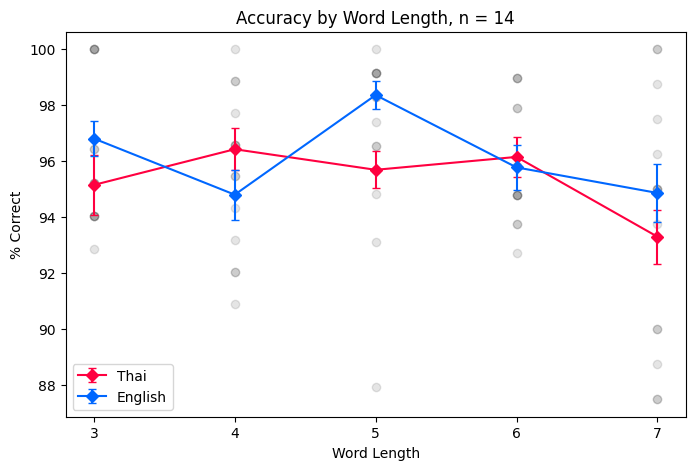

In [14]:
# Word length vs % correct
import random

# all data by user
norm_df = normall.groupby(['username', 'word_length'])['score'].mean().mul(100).unstack()
plt.figure(figsize = (8,5))

for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, color = 'black', alpha = 0.1, marker = 'o')
    # for len, val in accubylen.items():
    #     plt.text(len + random.uniform(-0.2,0.2), val, user)
e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normth.groupby('word_length')['score'].mean() * 100
sem_df = normth.groupby('word_length')['score'].sem() *100

plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = redgradient[4], marker =  'D', capsize = 3, label = 'Thai')
mean_df = normen.groupby('word_length')['score'].mean() * 100
sem_df = normen.groupby('word_length')['score'].sem() *100

plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = bluegradient[4], marker =  'D', capsize = 3, label = 'English')
# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
# patientmean_df = ptall.groupby('word_length')['score'].mean().mul(100)

# plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylabel("% Correct")
plt.xlabel("Word Length")
plt.title(f"Accuracy by Word Length, n = {n_subj}")
plt.xticks(np.arange(3,8,1))
legend_unique()
# plt.savefig("./figure/norm/III norm accu by wordlen.png")


truestate          0.0        1.0
word_length                      
3            95.918367  96.598639
4            95.454545  95.779221
5            95.935961  97.660099
6            95.386905  96.577381
7            92.321429  95.535714


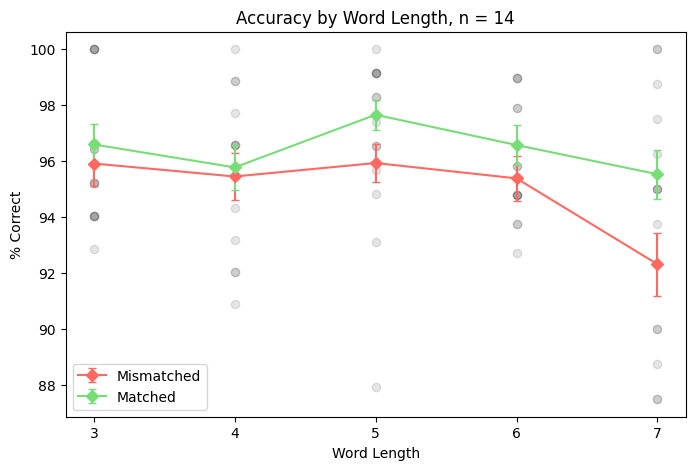

In [26]:
# Word length vs % correct
import random

# all data by user
norm_df = normall.groupby(['username', 'word_length'])['score'].mean().mul(100).unstack()
plt.figure(figsize = (8,5))

for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, color = 'black', alpha = 0.1, marker = 'o')
    # for len, val in accubylen.items():
    #     plt.text(len + random.uniform(-0.2,0.2), val, user)
e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normall.groupby(['word_length', 'truestate'])['score'].mean().mul(100).unstack()
sem_df = normall.groupby(['word_length', 'truestate'])['score'].sem().mul(100).unstack()
print(mean_df)
plt.errorbar(mean_df[0].index, mean_df[0].values, yerr = sem_df[0].values, color = colincorrect, marker =  'D', capsize = 3, label = 'Mismatched')
plt.errorbar(mean_df[1].index, mean_df[1].values, yerr = sem_df[1].values, color = colcorrect, marker =  'D', capsize = 3, label = 'Matched')

# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
# patientmean_df = ptall.groupby('word_length')['score'].mean().mul(100)

# plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylabel("% Correct")
plt.xlabel("Word Length")
plt.title(f"Accuracy by Word Length, n = {n_subj}")
plt.xticks(np.arange(3,8,1))
legend_unique()
# plt.savefig("./figure/norm/III norm accu by wordlen.png")


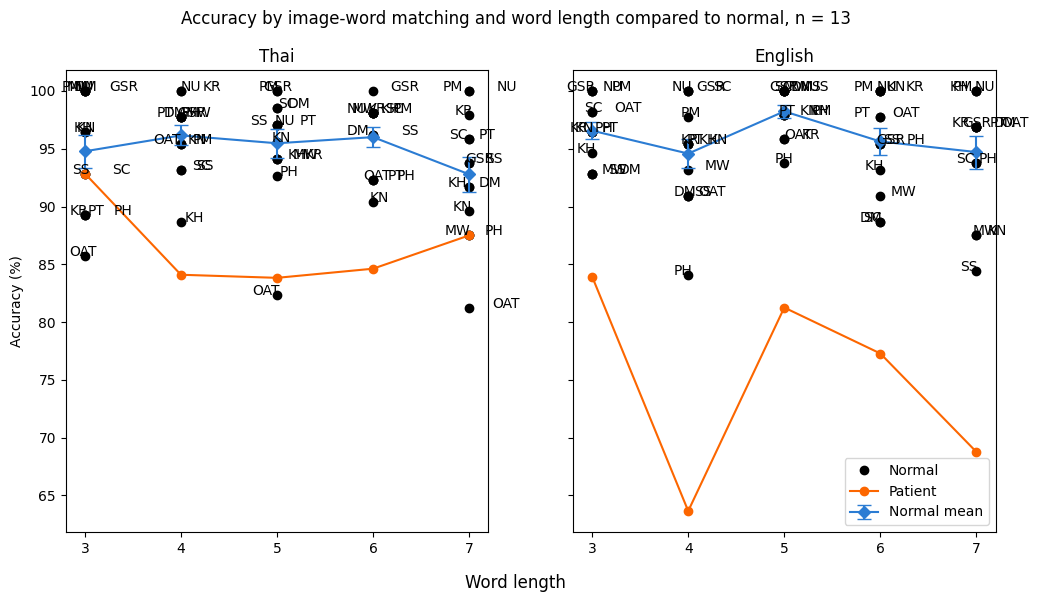

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

        for vi, vv in v.items():
            axs[i].text(vi + random.uniform(-0.3,0.3), vv, s )
    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['score'].mean().mul(100)
    s = lister[i][1].groupby(['word_length'])['score'].sem().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by image-word matching and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()
# plt.savefig("./figure/norm/III norm accu by wordlen and language.png")


# plot image and word accuracy
plot both accuracy of the task order that word shown match the image and word shown is not matched with the image

In [ ]:
d = normall.groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()

plt.figure(figsize = (5,5))
print(d)
for i, v in d.items():
    plt.plot(v.index, v.values, color = 'black', marker = 'o', alpha = 0.1)
    # for vi, vv in v.items():
    #     plt.text(vi, vv, i)
mean, sem = d.T.mean(), d.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'orange', capsize = 5, label = 'Normal mean')

# p = ptall.groupby(['truestate'])['score'].mean().mul(100)
# plt.plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

legend_unique()

plt.title(f"Accuracy by word-image matching, n = {n_subj}")
plt.ylabel("Accuracy (%)")
plt.xlabel("Word-image matching state")
plt.xticks(d.index, ['Unmatched','Matched'])
plt.margins(x=0.2)

# plt.savefig("./figure/norm/III norm accu by truestate.png")


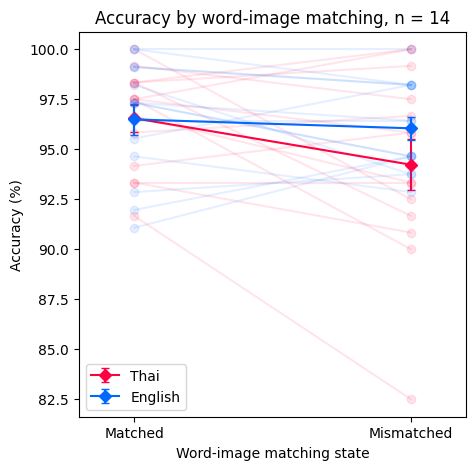

In [56]:
d = normth.groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]
plt.figure(figsize = (5,5))

for i, v in d.items():
    plt.plot(v.index, v.values, color = redgradient[4], marker = 'o', alpha = 0.1)
    # for vi, vv in v.items():
    #     plt.text(vi, vv, i)
mean, sem = d.T.mean(), d.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = redgradient[4], capsize = 3, label = 'Thai')


d = normen.groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]
for i, v in d.items():
    plt.plot(v.index, v.values, color = bluegradient[4], marker = 'o', alpha = 0.1)
    # for vi, vv in v.items():
    #     plt.text(vi, vv, i)
mean, sem = d.T.mean(), d.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = bluegradient[4], capsize = 3, label = 'English')

# p = ptall.groupby(['truestate'])['score'].mean().mul(100)
# plt.plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

legend_unique()

plt.title(f"Accuracy by word-image matching, n = {n_subj}")
plt.ylabel("Accuracy (%)")
plt.xlabel("Word-image matching state")
plt.xticks(d.index)
plt.margins(x=0.2)

# plt.savefig("./figure/norm/III norm accu by truestate.png")


truestate
Matched       96.520936
Mismatched    95.104680
dtype: float64


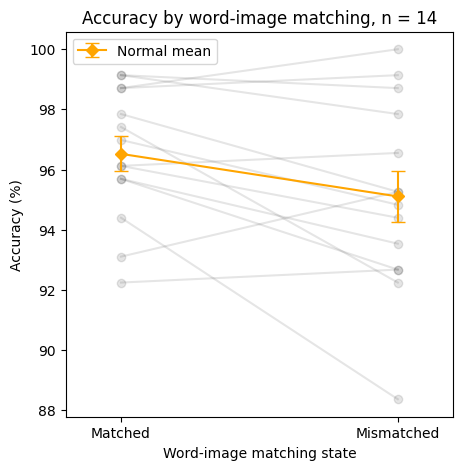

In [59]:
d = normall.groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]
plt.figure(figsize = (5,5))

for i, v in d.items():
    plt.plot(v.index, v.values, color = 'black', marker = 'o', alpha = 0.1)
    # for vi, vv in v.items():
    #     plt.text(vi, vv, i)
mean, sem = d.T.mean(), d.T.sem()

print(mean)
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'orange', capsize = 5, label = 'Normal mean')

# p = ptall.groupby(['truestate'])['score'].mean().mul(100)
# plt.plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

legend_unique()

plt.title(f"Accuracy by word-image matching, n = {n_subj}")
plt.ylabel("Accuracy (%)")
plt.xlabel("Word-image matching state")
plt.xticks(d.index)
plt.margins(x=0.2)

# plt.savefig("./figure/norm/III norm accu by truestate.png")


#  grouped bar chart with the correct and incorrect image accuracy, both language

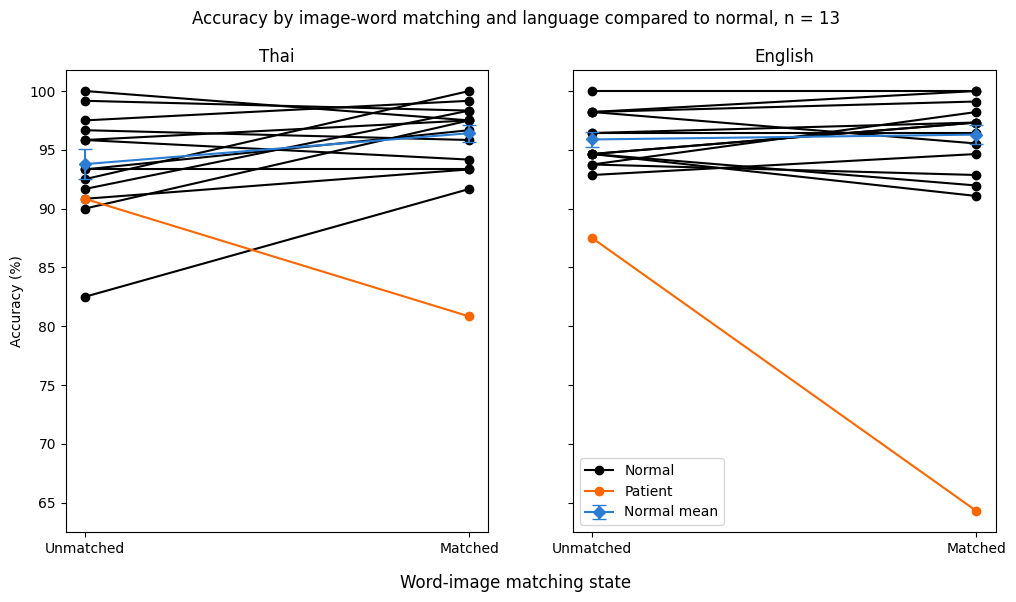

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten]]
for i in [0,1]:

    d = lister[i][0].groupby(['truestate', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['truestate'])['score'].mean().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by image-word matching and language compared to normal, n = {n_subj}")
fig.supxlabel("Word-image matching state")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([0,1], ['Unmatched','Matched'])
axs[1].set_xticks([0,1], ['Unmatched','Matched'])
legend_unique()

plt.savefig("./figure/norm/III norm accu by truestate and language.png")


# Reaction time part
---

In [27]:
# filtering
normall_filter = normall[normall['score'] == 1]
normth_filter = normth[normth['score'] == 1]
normen_filter = normen[normen['score'] == 1]
ptall_filter = ptall[ptall['score'] == 1]
ptth_filter = ptth[ptth['score'] == 1]
pten_filter = pten[pten['score'] == 1]

## Overall reaction time in both histogram and boxplot

In [30]:
import matplotlib.font_manager as fm
import math
thai_font_path="./THSarabun.ttf"
def histogramplot(inidf, lang, title, xlim=None):

    df = inidf.rename(columns={'key_resp.rt':'key_RT'})


    # Calculate outlier thresholds using IQR method
    Q1 = df['key_RT'].quantile(0.25)
    Q3 = df['key_RT'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df['key_RT'] < lower_bound) | (df['key_RT'] > upper_bound)]
    outliers.sort_values(by=['key_RT'], inplace = True)


    # Create the plot
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})

    #create x limit for global
    if xlim is None:
        x_lim = math.ceil(max(df['key_RT']))
    else:
        x_lim = xlim
    
    print(x_lim)

    # Boxplot (Top)
    sns.boxplot(data=df, x='key_RT', ax=axes[0], color='lightgray')
    axes[0].set_title(title)
    axes[0].set_xlabel('')
    axes[0].set_xticks(np.arange(0,x_lim+1,1))
    axes[0].set_xlim(0,x_lim)
    # axes[0].set_xticks(np.arange(0,16,1))

    # Annotate outliers with the corresponding 'word shown' using the Thai font if provided
    # prop = fm.FontProperties(fname=thai_font_path)
    # i = 0
    # for outlier_value, word in zip(outliers['key_RT'], outliers['word shown']):
    #     yax = 0 + 0.25 * ((-1) ** i)
    #     axes[0].text(outlier_value, yax, word, fontsize=10, ha='center', va = 'center',color='black', fontweight='light', rotation=90, fontproperties=prop)
    #     i = i + 1
# 
    # axes[0].set_yticks([])  # Hide y-axis ticks
    # axes[0].set_xlabel("")  # Remove x-axis label

    # Histogram (Bottom)
    colorchoice = thaicolor if lang == 'th' else engcolor if lang == 'en' else gaygradient[4] 
    axes[1].hist(df['key_RT'], bins=range(0, x_lim + 1, 1),color=colorchoice, alpha=0.7, edgecolor='black')
    axes[1].set_xlabel("Reaction Time (s)")
    
    axes[1].set_xticks(np.arange(0,x_lim+1,1))
    axes[1].set_xlim(0,x_lim)
    axes[1].set_ylabel("Frequency")
    # axes[1].set_xticks(np.arange(0,20,1))
    # axes[1].set_xlim(0,15)
    # axes[1].set_ylim(0,ylim)

    # # Save the plot if save_path is provided
    # if save_path:
    #     plt.savefig(save_path, bbox_inches='tight', dpi=300)
    #     print(f"Plot saved to {save_path}")

    # plt.close()  # Prevent displaying the plot



C:\Users\UserPC\AppData\Local\Temp\ipykernel_19944\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.sort_values(by=['key_RT'], inplace = True)
C:\Users\UserPC\AppData\Local\Temp\ipykernel_19944\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.sort_values(by=['key_RT'], inplace = True)
C:\Users\UserPC\AppData\Local\Temp\ipykernel_19944\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

22
22
22


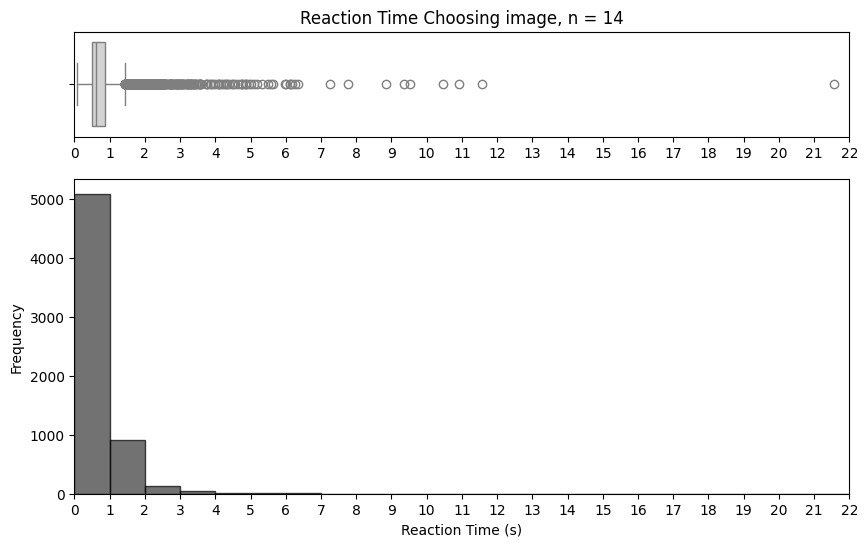

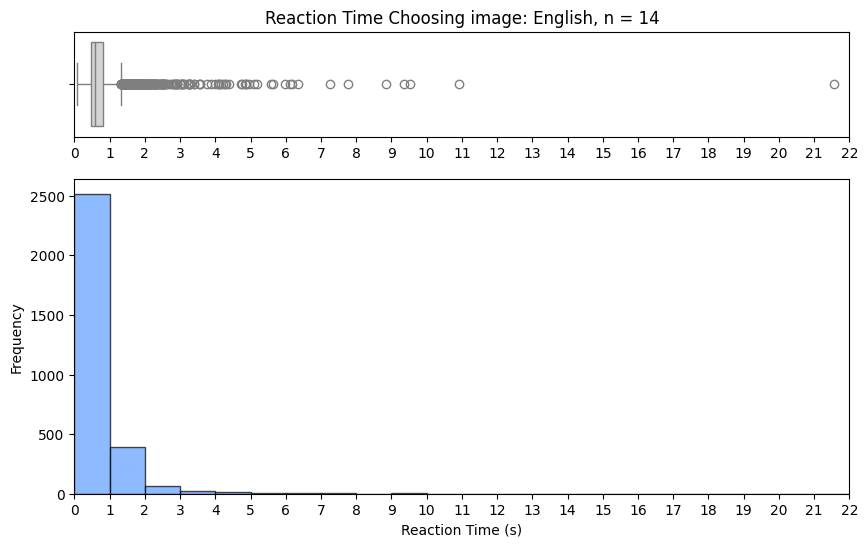

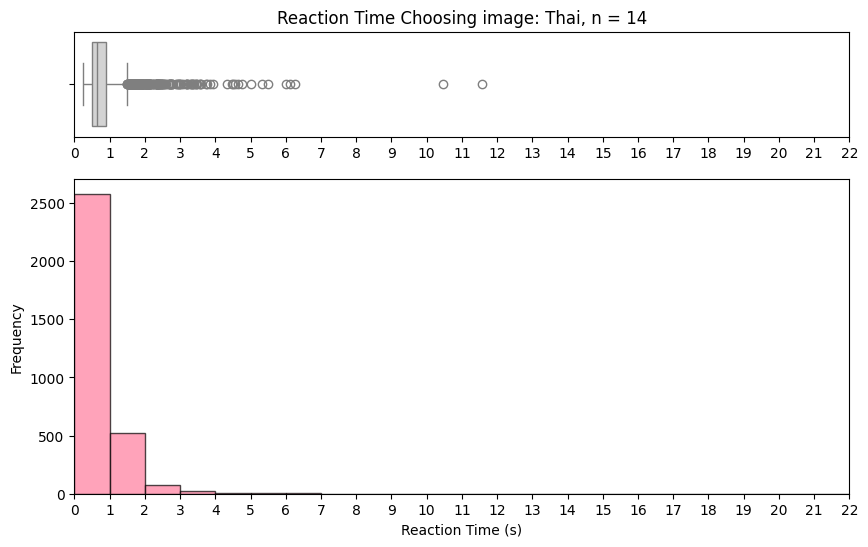

In [33]:
histogramplot(normall_filter, 'General', title=f"Reaction Time Choosing image, n = {n_subj}")
histogramplot(normen_filter, 'en', title=f"Reaction Time Choosing image: English, n = {n_subj}")
histogramplot(normth_filter, 'th', title=f"Reaction Time Choosing image: Thai, n = {n_subj}", xlim = 22)

# Reaction time by word image match state
plot a bar chart between reaction time (s) mean by the truestate of the task

truestate
Matched       0.729893
Mismatched    0.854110
dtype: float64


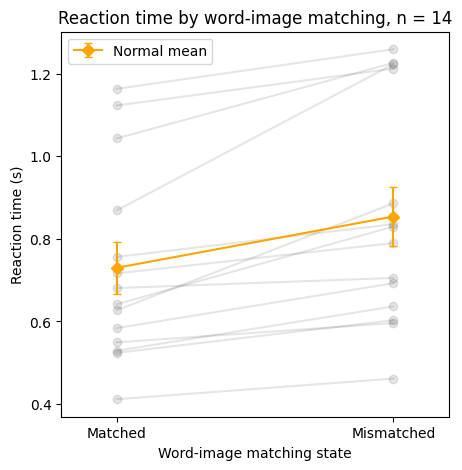

In [60]:
d = normall_filter.groupby(['truestate', 'username'])['key_RT'].mean().unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]

plt.figure(figsize=(5,5))
for i, v in d.items():
    plt.plot(v.index, v.values, color = 'black', marker = 'o', alpha = 0.1)
mean, sem = d.T.mean(), d.T.sem()
# mean, sem = mean.loc[[1,0]], sem.loc[[1,0]]
print(mean)
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'orange', capsize = 3, label = 'Normal mean')

# p = ptall_filter.groupby(['truestate'])['key_RT'].mean()
# s = ptall_filter.groupby(['truestate'])['key_RT'].sem()
# plt.errorbar(p.index, p.values, yerr = s.values, color = patient, capsize = 5, marker = 'o', label = "Patient")

legend_unique()

plt.title(f"Reaction time by word-image matching, n = {n_subj}")
plt.ylabel("Reaction time (s)")
plt.xlabel("Word-image matching state")

plt.margins(x=0.2)
# plt.savefig("./figure/norm/III norm RT by truestate.png")



truestate
Matched       0.741379
Mismatched    0.860416
dtype: float64
truestate
Matched       0.718052
Mismatched    0.846806
dtype: float64


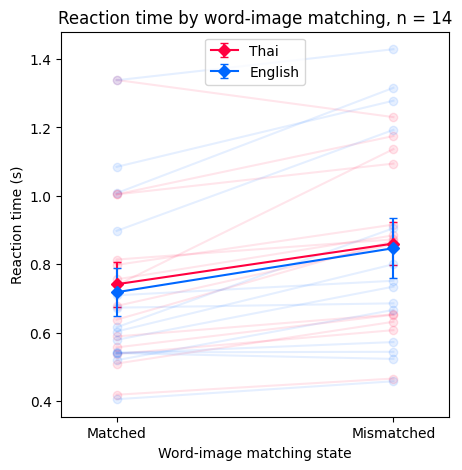

In [65]:
d = normth_filter.groupby(['truestate', 'username'])['key_RT'].mean().unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]

plt.figure(figsize=(5,5))
for i, v in d.items():
    plt.plot(v.index, v.values, color = redgradient[4], marker = 'o', alpha = 0.1)
mean, sem = d.T.mean(), d.T.sem()
# mean, sem = mean.loc[[1,0]], sem.loc[[1,0]]
print(mean)
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = redgradient[4], capsize = 3, label = 'Thai')

d = normen_filter.groupby(['truestate', 'username'])['key_RT'].mean().unstack()
d.rename(index={0:'Mismatched', 1:'Matched'}, inplace=True)
d = d.loc[['Matched', 'Mismatched']]

for i, v in d.items():
    plt.plot(v.index, v.values, color = bluegradient[4], marker = 'o', alpha = 0.1)
mean, sem = d.T.mean(), d.T.sem()
# mean, sem = mean.loc[[1,0]], sem.loc[[1,0]]
print(mean)
plt.errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = bluegradient[4], capsize = 3, label = 'English')

# p = ptall_filter.groupby(['truestate'])['key_RT'].mean()
# s = ptall_filter.groupby(['truestate'])['key_RT'].sem()
# plt.errorbar(p.index, p.values, yerr = s.values, color = patient, capsize = 5, marker = 'o', label = "Patient")

legend_unique()

plt.title(f"Reaction time by word-image matching, n = {n_subj}")
plt.ylabel("Reaction time (s)")
plt.xlabel("Word-image matching state")

plt.margins(x=0.2)
# plt.savefig("./figure/norm/III norm RT by truestate.png")



# Reaction time byword length
plot a bar chart between reaction time (s) mean by the word length

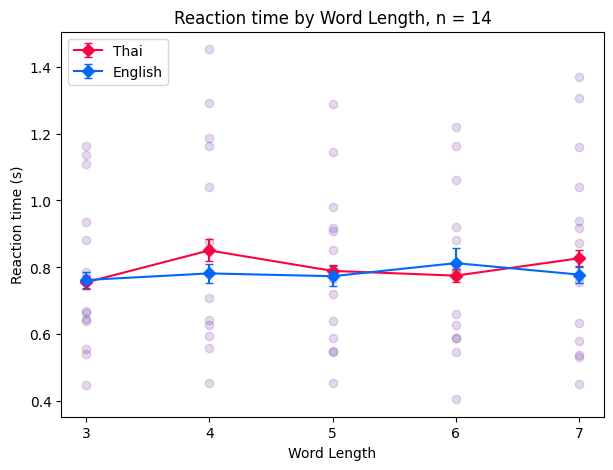

In [78]:
# Word length vs % correct

# all data by user
plt.figure(figsize=(7,5))
norm_df = normth.groupby(['username', 'word_length'])['key_RT'].mean().unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, color = redgradient[4], alpha = 0.1, marker = 'o')

# mean of all user
mean_df = normth_filter.groupby('word_length')['key_RT'].mean()
sem_df = normth_filter.groupby('word_length')['key_RT'].sem()

plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = redgradient[4], marker =  'D', capsize = 3, label = 'Thai')

norm_df = normth.groupby(['username', 'word_length'])['key_RT'].mean().unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, color = bluegradient[4], alpha = 0.1, marker = 'o')

# mean of all user
mean_df = normen_filter.groupby('word_length')['key_RT'].mean()
sem_df = normen_filter.groupby('word_length')['key_RT'].sem()

plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = bluegradient[4], marker =  'D', capsize = 3, label = 'English')

# Labels and title
plt.ylabel("Reaction time (s)")
plt.xlabel("Word Length")
plt.title(f"Reaction time by Word Length, n = {n_subj}")
plt.xticks(np.arange(3,8,1))
legend_unique()


truestate         0.0       1.0
word_length                    
3            0.801626  0.718970
4            0.899294  0.734578
5            0.833343  0.733534
6            0.875207  0.711038
7            0.868316  0.748925


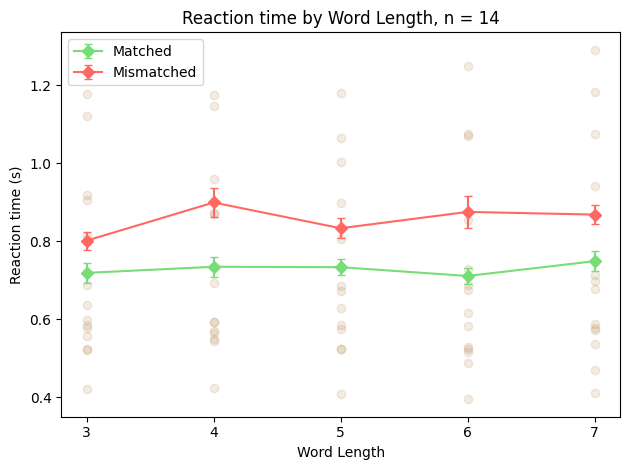

In [140]:
import matplotlib.pyplot as plt
import numpy as np

d = normall_filter.groupby(['username', 'word_length','truestate'])['key_RT'].mean().unstack()
d_flat = d.stack().reset_index()
d_true = d_flat[d_flat['truestate'] == 1]
d_false = d_flat[d_flat['truestate'] == 0]

plt.scatter(d_true['word_length'], d_true[0], color=colcorrect, alpha = 0.1)
plt.scatter(d_true['word_length'], d_true[0], color=colincorrect, alpha = 0.1)

m = normall_filter.groupby(['word_length','truestate'])['key_RT'].mean().unstack()
s = normall_filter.groupby(['word_length','truestate'])['key_RT'].sem().unstack()

plt.errorbar(m[1].index, m[1].values, yerr = s[1].values,  capsize = 3, marker = 'D', color = colcorrect, label = 'Matched')
plt.errorbar(m[0].index, m[0].values, yerr = s[0].values,  capsize = 3, marker = 'D', color = colincorrect, label = 'Mismatched')

print(m)
# Axes, labels, and title
plt.ylabel("Reaction time (s)")
plt.xlabel("Word Length")
plt.title(f"Reaction time by Word Length, n = {n_subj}")
plt.xticks(np.arange(3, 8, 1))
legend_unique()  # your custom legend function
plt.tight_layout()
